### --------------------------------------------------------------------------------------------------------
# Programming(Python)
# Educational materials for e-Learning(Exercise)
## Medical Data Scientist course
### Ver0.2(α版) 2019/1/11 Akira Izumi
### --------------------------------------------------------------------------------------------------------

## Pima Indian diabetes data
https://github.com/niharikagulati/diabetesprediction/blob/master/diabetes.csv  
For the meaning of the variables of the read data, see below.

| column # | variables |
|:---------|:----------|
| 0 | Number of times pregnant |
| 1 | Plasma glucose concentration a 2 hours in an oral glucose tolerance test [mg/dL] |
| 2 | Diastolic blood pressure [mm/Hg] |
| 3 | Triceps skins fold thickness [mm] |
| 4 | 2-hour serum insulin [mu U/ml] |
| 5 | Body Mass Index |
| 6 | Diabetes pedigree function |
| 7 | Age [years] |
| 8 | Outcome:  Class Variable {0, 1} where '1' denotes patient having diabetes | 

###  Note: Because there is a missing value in the data, it is recommended to replace the null value with mode (most often) or mean (average value).
> Data Cleaning will take place as data has got lot of missing values.  
> Handling missing values can be done either by replacing null values with mode or mean or replacing the null value with a random variable.

In [1]:
# Reading data

import pandas as pd

# Upload the csv file in the home directory of Jupyter Notebook.

# File name
filename = "pima-indians-diabetes.data.csv"

# Use the pandas' read_csv method to read the csv file.
# The optional "sep" specifies a delimiter.
# There is no column name in the csv file to be read, give the column name with the names option.
df = pd.read_csv(filename, sep=',',
                 names=[
                     'Pregnancies',
                     'Glucose',
                     'Blood Pressure',
                     'Skin Thickness',
                     'Insulin',
                     'BMI',
                     'Diabetes Pedigree Function',
                     'Age',
                     'Outcome'
                 ]
                )

※You can also read data even if you specify the file path.
There is no problem if it is Linux / Unix, but the following correspondence is required when inserting Windows path.
- Insert "r" before string
Example: filepath = r'C:\Users\ntohmatsu\python_data\pima-indians-diabetes.csv'
- Insert two circle marks of delimiter
Example: filepath = 'C:\\Users\\ntohmatsu\\python_data\\pima-indians-diabetes.csv'

df = pd.read_csv(filepath, sep=',',
                 names=[
                     'Pregnancies',
                     'Glucose',
                     'Blood Pressure',
                     'Skin Thickness',
                     'Insulin',
                     'BMI',
                     'Diabetes Pedigree Function',
                     'Age',
                     'Outcome'
                 ]
                )

In [2]:
# Confirm reading data

df.head()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Confirm the number of rows and columns

df.shape

(768, 9)

In [4]:
# Confirm the data type of each variable

df.dtypes

Pregnancies                     int64
Glucose                         int64
Blood Pressure                  int64
Skin Thickness                  int64
Insulin                         int64
BMI                           float64
Diabetes Pedigree Function    float64
Age                             int64
Outcome                         int64
dtype: object

## Data summarization and visualization

In [5]:
# Check how many "Null" are in each column.

# The method "isnull" outputs True if each element is missing value (NaN), False otherwise
# The method "sum" will output the sum of the values. The optional axis = 0 sums the rows, and the axis = 1 outputs the total of the columns
# Also note that True is 1 and False is equivalent to 0

# From the results, you can see that missing values are represented by something other than NaN

print(df.isnull().sum(axis=0))

Pregnancies                   0
Glucose                       0
Blood Pressure                0
Skin Thickness                0
Insulin                       0
BMI                           0
Diabetes Pedigree Function    0
Age                           0
Outcome                       0
dtype: int64


In [6]:
# Calculating basic statistics
# Number of data, average, standard deviation, minimum value, percentile (25%, 50%, 75%), maximum value

"""
Although Pregnancies (pregnancy count) is '0', it is uncomfortable,
It is uncomfortable that Glucose (blood sugar concentration) and Blood Pressure (blood pressure) are 0
Therefore, you can see that the missing value is entered as 0
"""

df.describe()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Calculate basic statistics for each group
# Diabetic patients tend to have higher values for each variable than non-patients

df_group_describe = df.groupby('Outcome').describe()
for col_ind in df.columns[:-1]:
    print(col_ind + ":\n" + str(df_group_describe[col_ind].T) + "\n")

Pregnancies:
Outcome           0           1
count    500.000000  268.000000
mean       3.298000    4.865672
std        3.017185    3.741239
min        0.000000    0.000000
25%        1.000000    1.750000
50%        2.000000    4.000000
75%        5.000000    8.000000
max       13.000000   17.000000

Glucose:
Outcome         0           1
count    500.0000  268.000000
mean     109.9800  141.257463
std       26.1412   31.939622
min        0.0000    0.000000
25%       93.0000  119.000000
50%      107.0000  140.000000
75%      125.0000  167.000000
max      197.0000  199.000000

Blood Pressure:
Outcome           0           1
count    500.000000  268.000000
mean      68.184000   70.824627
std       18.063075   21.491812
min        0.000000    0.000000
25%       62.000000   66.000000
50%       70.000000   74.000000
75%       78.000000   82.000000
max      122.000000  114.000000

Skin Thickness:
Outcome           0           1
count    500.000000  268.000000
mean      19.664000   22.164179
s

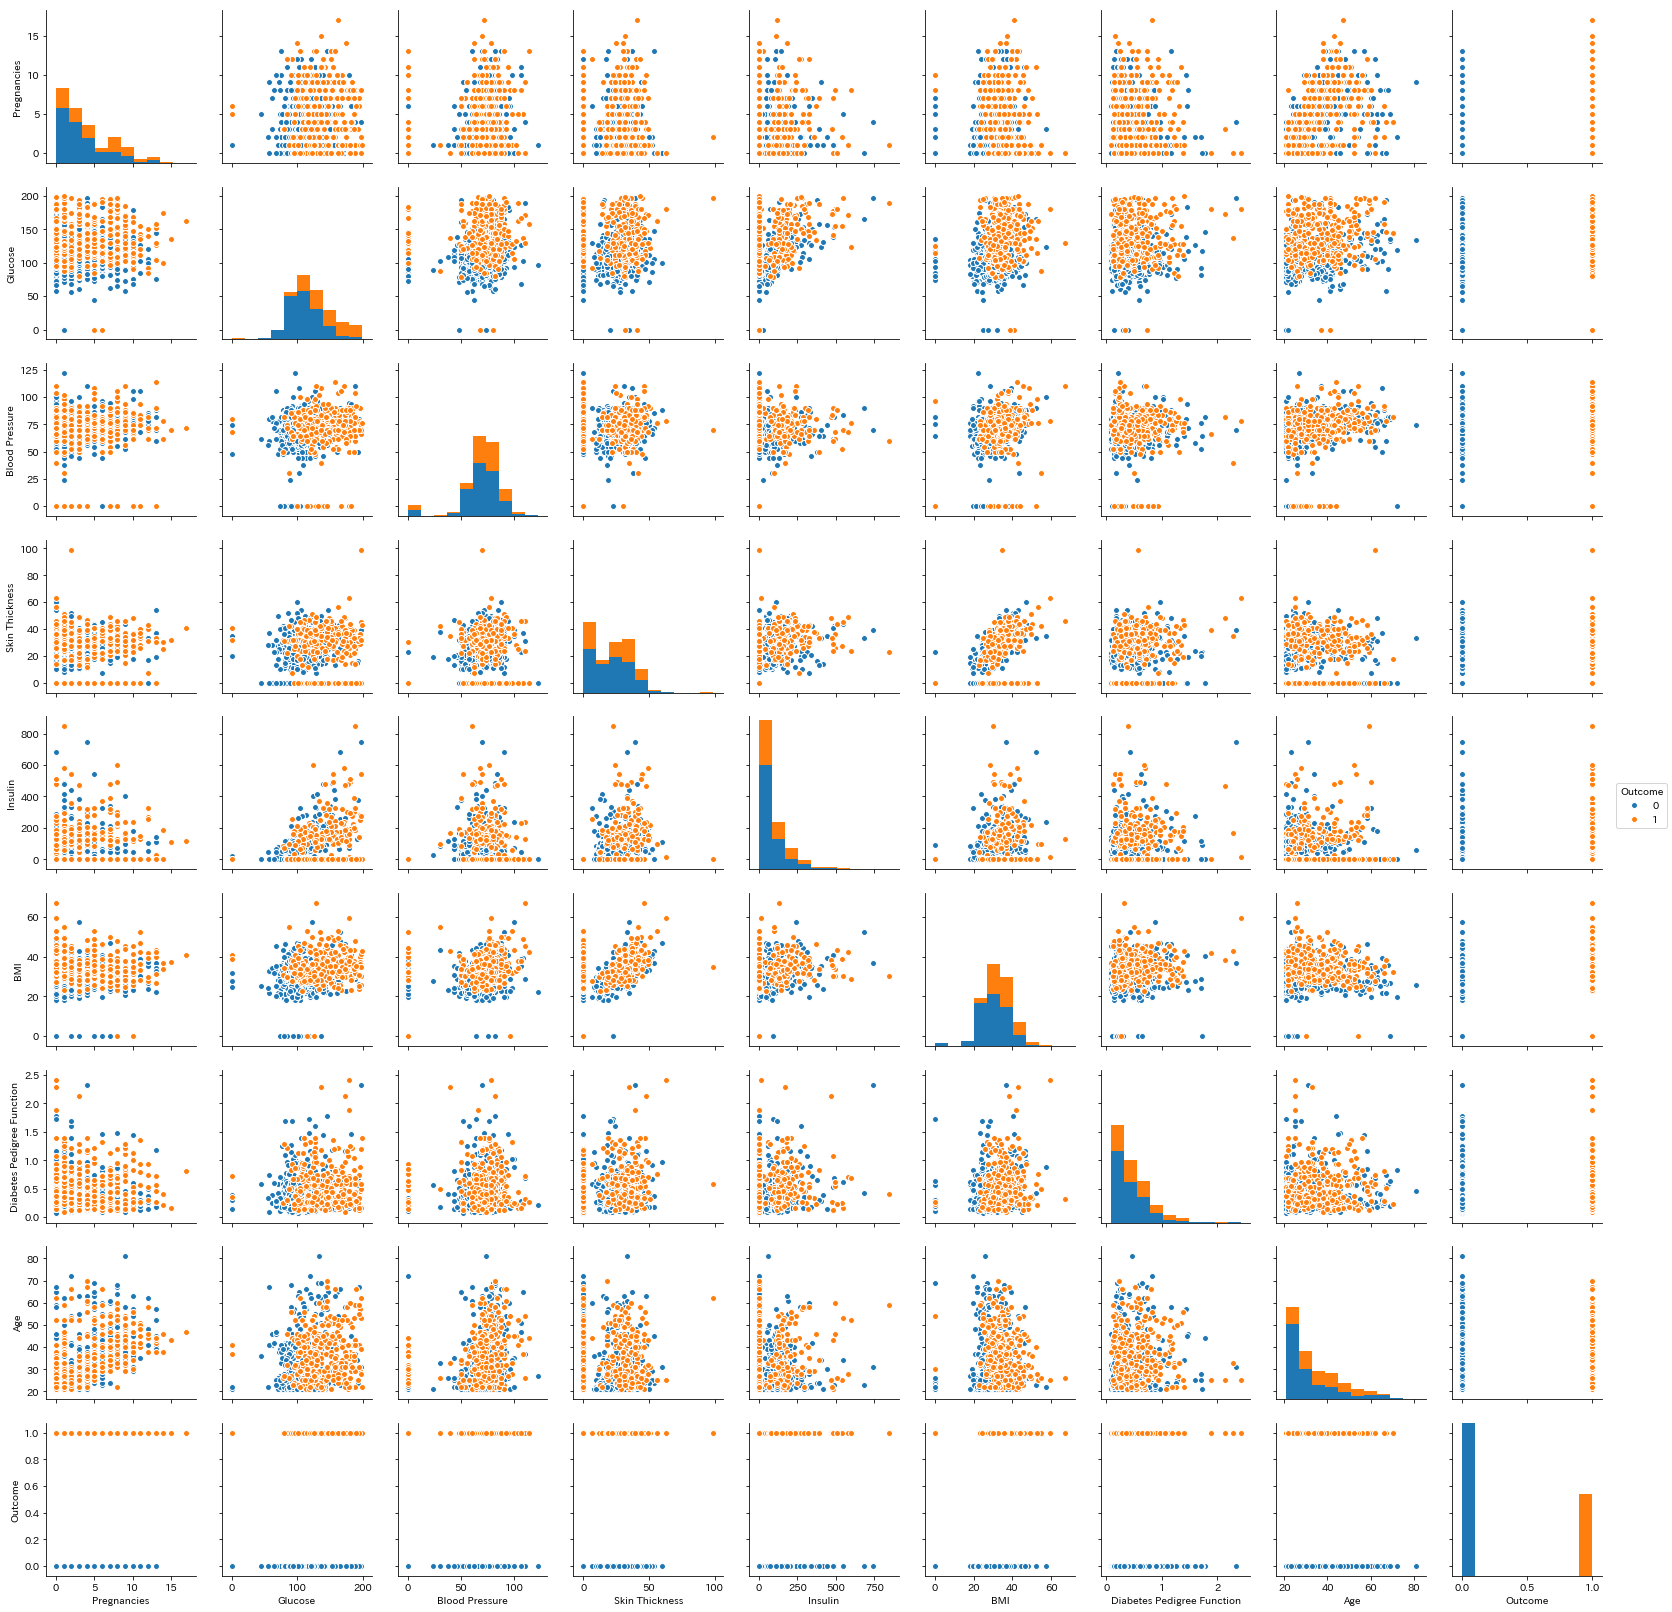

In [8]:
# Use of library for data visualization matplotlib

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# It seems that there is a difference in Glucose and Age

sns.pairplot(df, hue='Outcome')

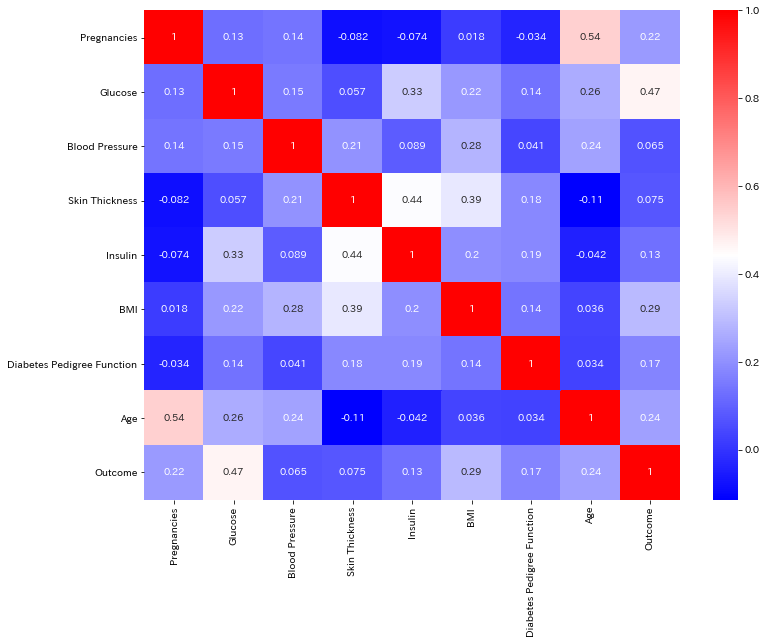

In [9]:
# Confirm correlation between each data
# Image size setting

plt.figure(figsize=(12, 9))

# Heat map of correlation coefficient matrix
# It can be confirmed that there is a relatively high correlation between Age and Pregnancies

sns.heatmap(df.corr(), cmap='bwr', annot=True)

## Complement missing values

In [10]:
# Check the number of missing values
#Enumerate inappropriate columns with '0'

imputer_cols = df.columns[[1,2,3,4,5,6]]

# Check the number of '0' in each column

df[imputer_cols][df[imputer_cols]==0].count()

Glucose                         5
Blood Pressure                 35
Skin Thickness                227
Insulin                       374
BMI                            11
Diabetes Pedigree Function      0
dtype: int64

In [11]:
# To correct missing values, create corrected data frame correct_df
# Read the same data as df once

correct_df = df.copy()

# In this example, "arithmetic mean" (mean method) is used to complement the missing value '0'
# In other cases, you may use "median" (median attribute) or "mode" (mode method)
# The mask method is used for value substitution, the first argument is condition and the second argument is replaced value

for i in imputer_cols:
    correct_df[i] = correct_df[i].mask(df[i]==0, df[i].mean())

# Looking at the 0th to 2nd lines of the Insulin column, we see that what was originally '0' is replaced by '79 .799479'

correct_df.head()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [12]:
# Calculating basic statistics after missing value correction

# Number of data, average, Yang Jin deviation, minimum value, percentile (25%, 50%, 75%), maximum value
# Looking at the minimum value of the column to be modified, it is larger than '0' and it is understood that the missing value is supplemented

correct_df.describe()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
# Calculate basic statistics for each group after missing value correction

correct_df_group_describe = correct_df.groupby('Outcome').describe()
for col_ind in correct_df.columns[:-1]:
    print(col_ind + ":\n" + str(correct_df_group_describe[col_ind].T) + "\n")

Pregnancies:
Outcome           0           1
count    500.000000  268.000000
mean       3.298000    4.865672
std        3.017185    3.741239
min        0.000000    0.000000
25%        1.000000    1.750000
50%        2.000000    4.000000
75%        5.000000    8.000000
max       13.000000   17.000000

Glucose:
Outcome           0           1
count    500.000000  268.000000
mean     110.705367  142.159661
std       24.715021   29.545943
min       44.000000   78.000000
25%       93.000000  119.000000
50%      107.500000  140.000000
75%      125.000000  167.000000
max      197.000000  199.000000

Blood Pressure:
Outcome           0           1
count    500.000000  268.000000
mean      70.810008   74.950326
std       11.932269   12.016572
min       24.000000   30.000000
25%       63.500000   68.000000
50%       70.000000   74.000000
75%       78.000000   82.000000
max      122.000000  114.000000

Skin Thickness:
Outcome           0           1
count    500.000000  268.000000
mean      25.37

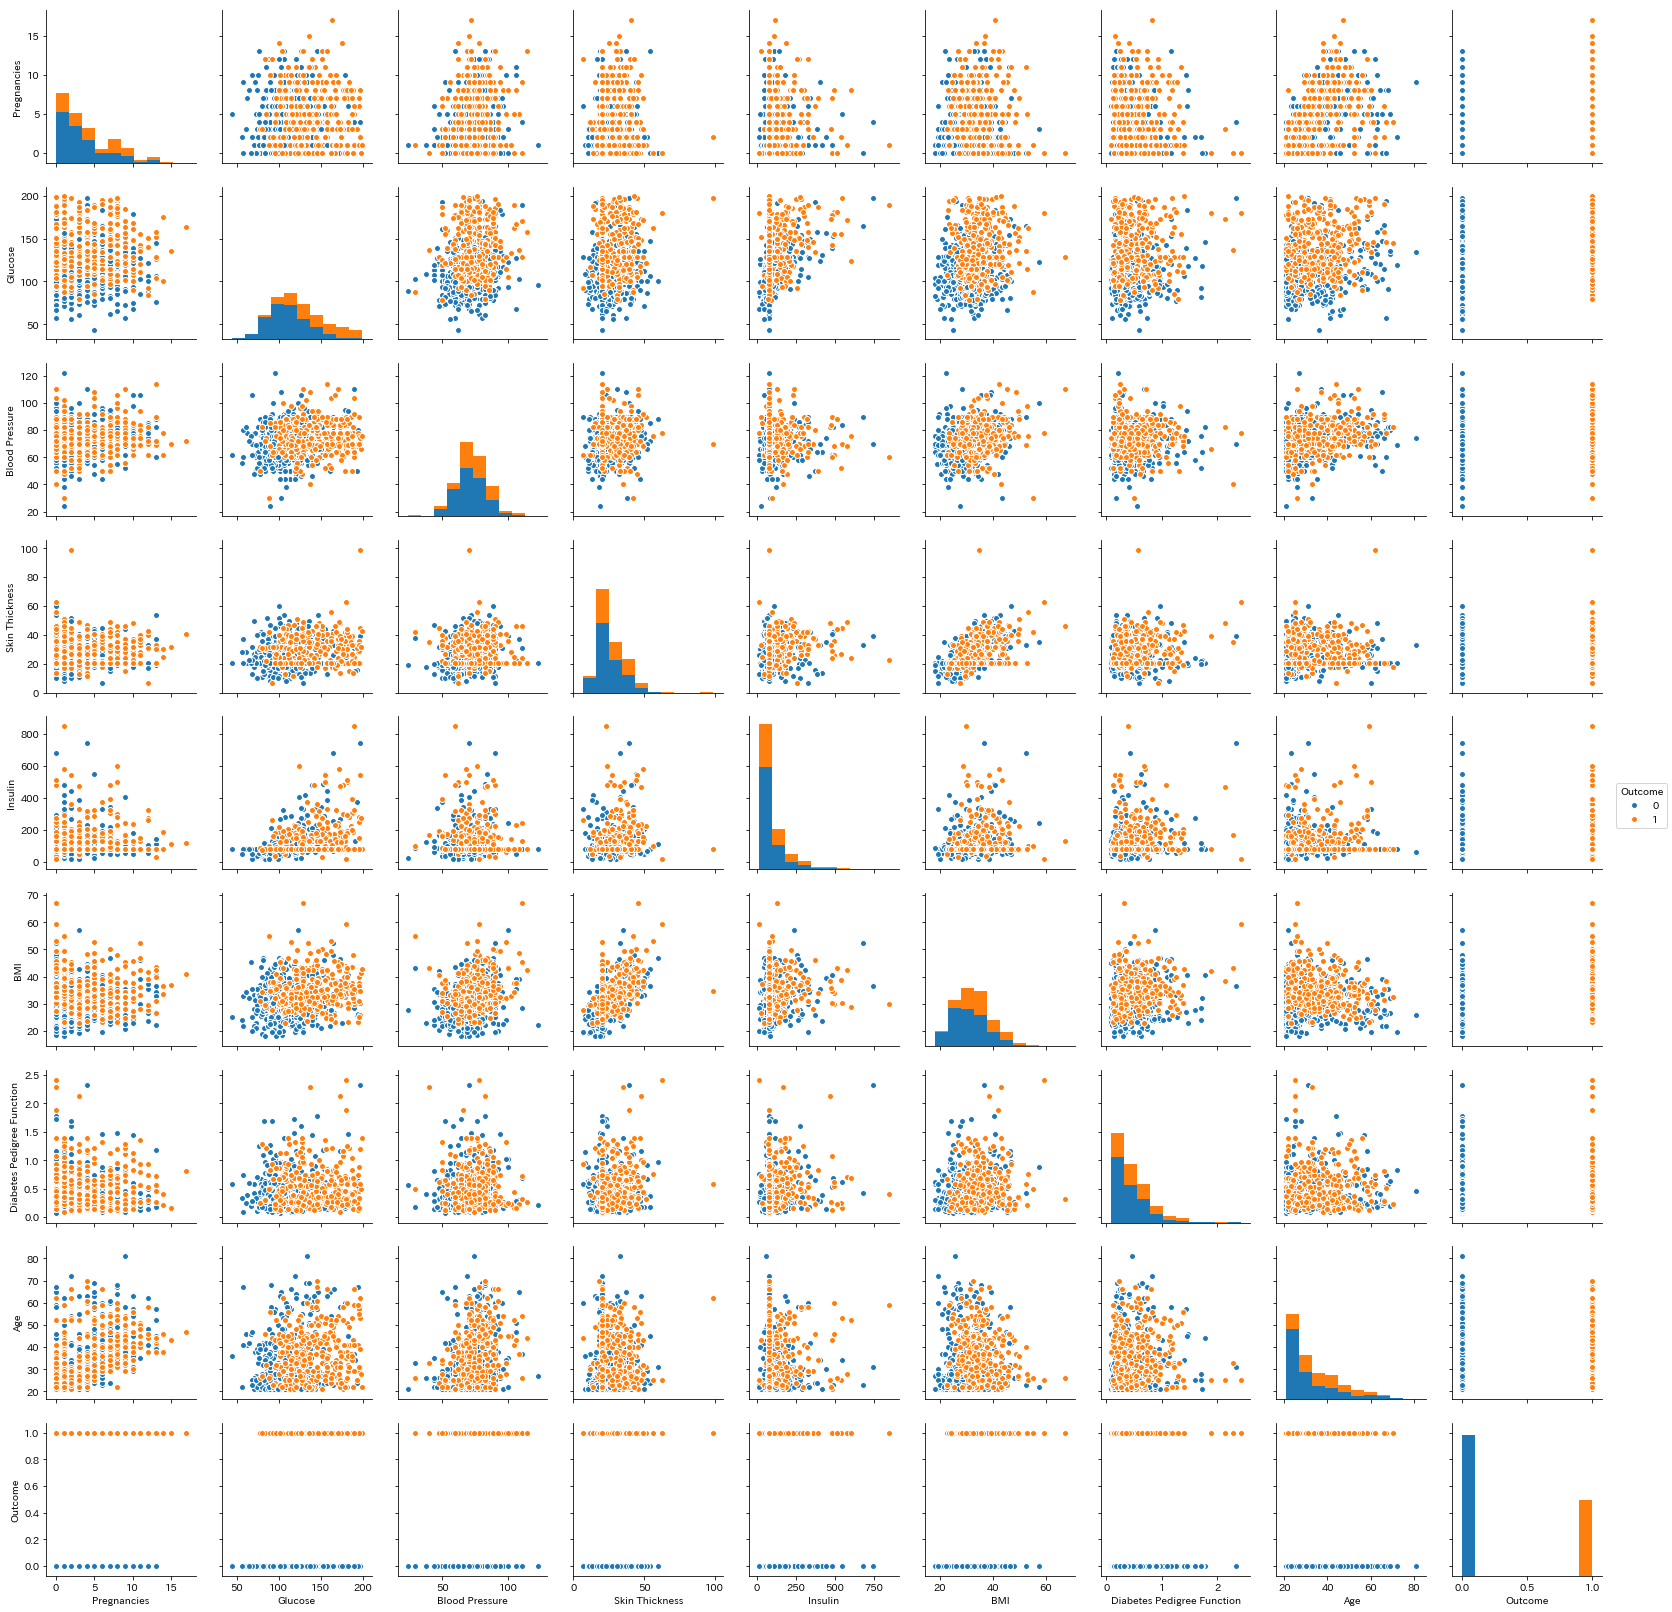

In [14]:
# Use matplotlib which is a data visualization library

sns.pairplot(correct_df, hue='Outcome')

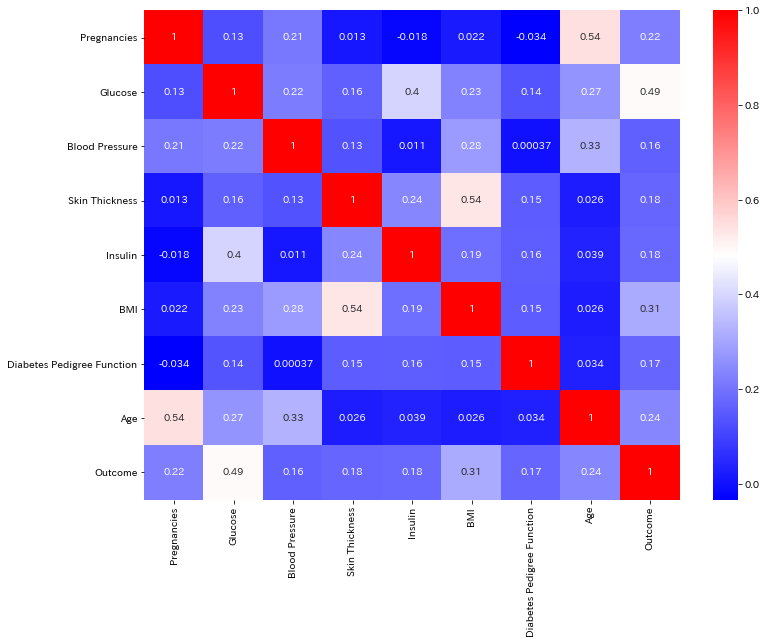

In [15]:
# Confirm correlation between each data
# Image size setting

plt.figure(figsize=(12, 9))

# Heat map of correlation coefficient matrix
# It can be confirmed that there is a relatively high correlation between Age and Pregnancies

sns.heatmap(correct_df.corr(), cmap='bwr', annot=True)

## Create machine learning model

In [16]:
# Selection of explanatory variable and purpose variable
# Select explanatory variable

X = correct_df.loc[:, correct_df.columns[:-1]]

# Select objective variable

y = correct_df.loc[:, 'Outcome']

# Confirm that it was split correctly

print("X=\n" + str(X.head()) + '\n')
print("y=\n" + str(y.head()))

X=
   Pregnancies  Glucose  Blood Pressure  Skin Thickness     Insulin   BMI  \
0            6    148.0            72.0       35.000000   79.799479  33.6   
1            1     85.0            66.0       29.000000   79.799479  26.6   
2            8    183.0            64.0       20.536458   79.799479  23.3   
3            1     89.0            66.0       23.000000   94.000000  28.1   
4            0    137.0            40.0       35.000000  168.000000  43.1   

   Diabetes Pedigree Function  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  

y=
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [17]:
#　Split of learning data and evaluation data

# There is a model_selection method that easily splits the data into the scikit-learn library

from sklearn import model_selection

# By using the train_test_split method, 
# data is divided according to test_size (33% in the case below, 67% of learning data)

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=1/5, random_state=0
)

In [18]:
# Confirm that the data is divided correctly

print("The size of learning explanatory variable is {}".format(X_train.shape))
print("The size of learning explanatory variable is {}".format(y_train.shape))
print("The size of learning explanatory variable is {}".format(X_test.shape))
print("The size of learning explanatory variable is {}".format(y_test.shape))

The size of learning explanatory variable is (614, 8)
The size of learning explanatory variable is (614,)
The size of learning explanatory variable is (154, 8)
The size of learning explanatory variable is (154,)


In [19]:
# Standardization of data

# The scikit-learn library contains a StandardScaler class that standardizes

from sklearn.preprocessing import StandardScaler

# Create an instance
scaler = StandardScaler()

# Standardization of learning data
# The fit_transform method standardizes with the mean and variance of each column
# Although DataConversionWarning is issued, it can ignore it (to convert int64 type to float 64 type).

st_X_train = scaler.fit_transform(X_train)

# Standardization of evaluation data
# The transform method is standardized using the average and variance when finally using fit_transform
#Warning here also will be, but because it is similar to the previous one, there is no problem ignoring it.

st_X_test = scaler.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


In [20]:
# Confirm whether standardization is done

pd.DataFrame(st_X_train, columns=X.columns).describe()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age
count,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02
mean,-3.498830e-17,2.304526e-16,5.457090e-16,-1.269343e-16,1.027047e-16,5.421604e-16,-8.317632e-17,-3.905671e-17
std,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00
min,-1.126063e+00,-2.569012e+00,-4.032242e+00,-2.031619e+00,-1.115187e+00,-2.063755e+00,-1.166818e+00,-1.048981e+00
25%,-8.354355e-01,-7.501453e-01,-7.060179e-01,-6.364212e-01,-4.251935e-01,-7.187784e-01,-6.862388e-01,-7.991138e-01
50%,-2.541807e-01,-1.218096e-01,-4.077314e-02,-3.825050e-01,-4.251935e-01,-3.198168e-02,-2.927647e-01,-3.826685e-01
75%,6.177016e-01,6.388074e-01,6.244717e-01,6.224237e-01,1.012245e-01,5.940049e-01,4.205946e-01,6.168003e-01
max,3.814603e+00,2.523815e+00,4.117007e+00,7.450785e+00,7.609419e+00,4.932986e+00,5.867657e+00,3.948363e+00


In [21]:
# Logistic regression model

# Importing the LogisticRegression class

from sklearn.linear_model import LogisticRegression

# Create an instance
# Optional solver is the optimization method, max_iter is the maximum number of iterations

lr = LogisticRegression(solver='lbfgs', class_weight='balanced',
                        max_iter=1e5, random_state=0)

# Learning (parameter estimation)

lr.fit(st_X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100000.0,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=0,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


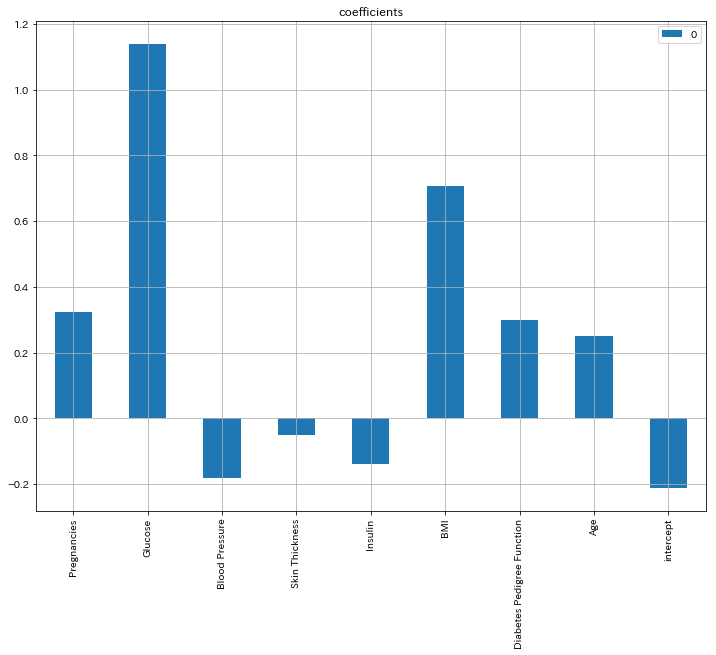

In [22]:
# Visualization of regression coefficients

# Store in DataFrame

coefs = pd.DataFrame(
    lr.coef_,
    columns=X.columns
)
coefs['intercept'] = lr.intercept_

# Visualization of DataFrame

coefs.T.plot(y=coefs.index, kind='bar', title='coefficients', grid=True, figsize=(12,9))

In [23]:
# Calculation of predicted value

# Apply the predict method to the already learned model instance and output the predicted value

y_pred = lr.predict(st_X_test)

### Evaluate model accuracy

              precision    recall  f1-score   support

           1       0.60      0.70      0.65        47
           0       0.86      0.79      0.83       107

   micro avg       0.77      0.77      0.77       154
   macro avg       0.73      0.75      0.74       154
weighted avg       0.78      0.77      0.77       154



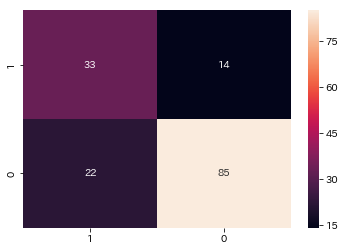

In [24]:
# Calculation of accuracy evaluation (partial visualization)

# Confirm confusion matrix, classification_report

from sklearn.metrics import confusion_matrix, classification_report

labels = [1,0]

# Output of classification_report

print(classification_report(y_test, y_pred, labels=labels))

# Output confusion matrix

# If medical examination is '1' positive, '0' negative, the upper left is true positive, 
# the lower right is true negative, the upper right is false positive, the lower left is false negative.

conf_mtx = confusion_matrix(y_test, y_pred, labels=labels)

# Visualize as a heat map
# The optional annot shows the corresponding number in each cell of the heat map

sns.heatmap(conf_mtx, annot=True, xticklabels=labels, yticklabels=labels)

### Hyper parameter tuning

In [25]:
from sklearn.model_selection import GridSearchCV

# Selection of prediction model

lr_gs = LogisticRegression(class_weight='balanced', max_iter=1e5,
                           random_state=0, dual=False)

# Adjustment range of hyper parameter
# Regularization index 'penalty': 'L1 norm' or 'L2 norm'
# Intensity of regularization 'C': From the fifth power to the fifth power of 10, 0.5 intervals

import numpy as np
tuning_params = [
    {
        'penalty': ['l1'],
        'solver': ['saga'],
        'C': 10.**np.arange(-5, 5.5, 0.5)
    },
    {
        'penalty': ['l2'],
        'solver': ['lbfgs'],
        'C': 10.**np.arange(-5, 5.5, 0.5)
    }
]

# Gspms instantiation of grid search
# Prediction model: lr_gs (linear support vector machine identification machine)
# Parameters to adjust: tuning_params
# Number of divided blocks in cross validation method: cv
# Scoring method: f1 value, micro average
# Parallel processing number: n_jobs (1 for no parallel processing, -1 for all processors)
# Weighting the score based on the number of samples of the test data: iid (this option will be deleted in the future)
# Score output of learning data: return_train_score (current default is 'warm' but in the future this option will be False)

lr_gs = GridSearchCV(
    lr_gs, tuning_params,
    cv=10, scoring='f1_micro', n_jobs=1, 
    iid=False, return_train_score=False
)

In [26]:
# Performing a grid search

lr_gs.fit(st_X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100000.0,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=0,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=1,
       param_grid=[{'penalty': ['l1'], 'solver': ['saga'], 'C': array([1.00000e-05, 3.16228e-05, 1.00000e-04, 3.16228e-04, 1.00000e-03,
       3.16228e-03, 1.00000e-02, 3.16228e-02, 1.00000e-01, 3.16228e-01,
       1.00000e+00, 3.16228e+00, 1.00000e+01, 3.16228e+01, 1.00000e+02,
       3.16228e+02, 1.00000...e+02,
       3.16228e+02, 1.00000e+03, 3.16228e+03, 1.00000e+04, 3.16228e+04,
       1.00000e+05])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='f1_micro', verbose=0)

In [27]:
# Display the result of cross verification (cv_results_attribute) as DataFrame
# Sort average accuracy in descending order

lr_gs_results = pd.DataFrame(lr_gs.cv_results_)
lr_gs_results.sort_values('mean_test_score', ascending=False)

,mean_fit_time,mean_score_time,mean_test_score,param_C,param_penalty,param_solver,params,rank_test_score,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,std_fit_time,std_score_time,std_test_score
28,0.003291,0.000895,0.757310,0.0316228,l2,lbfgs,"{'C': 0.03162277660168379, 'penalty': 'l2', 's...",1,0.730159,0.774194,...,0.786885,0.721311,0.786885,0.770492,0.688525,0.770492,0.737705,0.001412,0.000531,0.034563
29,0.004889,0.000798,0.755723,0.1,l2,lbfgs,"{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}",2,0.730159,0.741935,...,0.754098,0.704918,0.819672,0.786885,0.688525,0.786885,0.737705,0.002856,0.000281,0.041076
9,0.002993,0.000736,0.755671,0.316228,l1,saga,"{'C': 0.31622776601683794, 'penalty': 'l1', 's...",3,0.746032,0.741935,...,0.754098,0.704918,0.786885,0.786885,0.688525,0.786885,0.754098,0.000436,0.000270,0.035879
31,0.004966,0.000768,0.754058,1,l2,lbfgs,"{'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}",4,0.746032,0.758065,...,0.754098,0.704918,0.803279,0.770492,0.688525,0.786885,0.754098,0.003148,0.000258,0.033114
10,0.003045,0.000659,0.754058,1,l1,saga,"{'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}",4,0.746032,0.758065,...,0.737705,0.704918,0.803279,0.786885,0.688525,0.786885,0.754098,0.000377,0.000167,0.034700
11,0.003239,0.000714,0.754058,3.16228,l1,saga,"{'C': 3.1622776601683795, 'penalty': 'l1', 'so...",4,0.746032,0.758065,...,0.754098,0.704918,0.803279,0.770492,0.688525,0.786885,0.754098,0.000385,0.000323,0.033114
12,0.003175,0.000648,0.754058,10,l1,saga,"{'C': 10.0, 'penalty': 'l1', 'solver': 'saga'}",4,0.746032,0.758065,...,0.754098,0.704918,0.803279,0.770492,0.688525,0.786885,0.754098,0.000593,0.000220,0.033114
30,0.004197,0.001000,0.752471,0.316228,l2,lbfgs,"{'C': 0.31622776601683794, 'penalty': 'l2', 's...",8,0.730159,0.758065,...,0.754098,0.704918,0.803279,0.770492,0.688525,0.786885,0.754098,0.001165,0.000552,0.033834
41,0.003530,0.000702,0.752419,100000,l2,lbfgs,"{'C': 100000.0, 'penalty': 'l2', 'solver': 'lb...",9,0.746032,0.758065,...,0.754098,0.704918,0.803279,0.754098,0.688525,0.786885,0.754098,0.001361,0.000285,0.032663
35,0.005968,0.000694,0.752419,100,l2,lbfgs,"{'C': 100.0, 'penalty': 'l2', 'solver': 'lbfgs'}",9,0.746032,0.758065,...,0.754098,0.704918,0.803279,0.754098,0.688525,0.786885,0.754098,0.002914,0.000176,0.032663


In [28]:
print('Size of lr_gs_results: ' + str(lr_gs_results.shape) )
print('Best Average Accuracy: ' + str(lr_gs_results.loc[lr_gs_results.index[0], 'mean_test_score']))

Size of lr_gs_results: (42, 21)
Best Average Accuracy: 0.4179992109658953


In [29]:
# Confirm optimal parameters (best_estimator_attribute)

# As a result of cross validation, regularization index 'penalty' is L2 norm '
# Regularization strength 'C' can result that the combination of 10 to -1.5 power is optimal

lr_gs.best_estimator_

LogisticRegression(C=0.03162277660168379, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100000.0,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=0,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


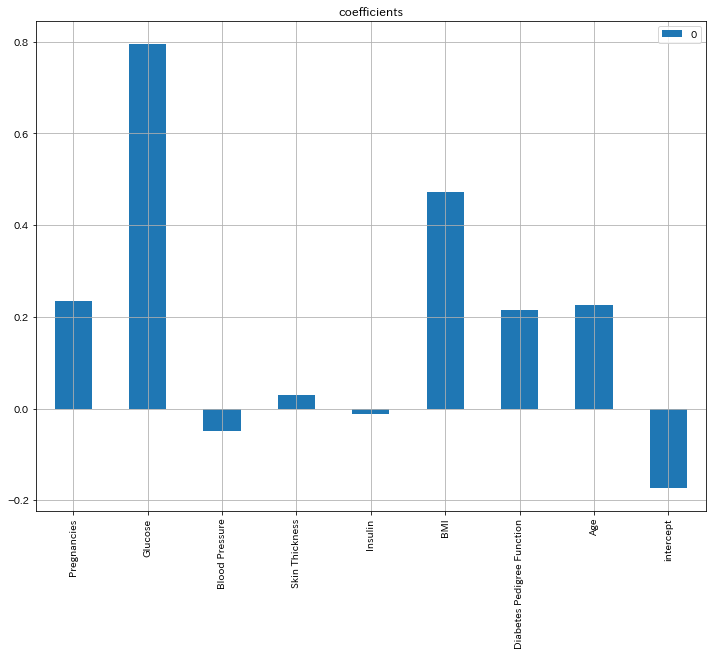

In [30]:
# Visualization of discriminant hyperplane coefficients

# Store in DataFrame

coefs = pd.DataFrame(
    lr_gs.best_estimator_.coef_,
    columns=df.columns[:-1]
)
coefs['intercept'] = lr_gs.best_estimator_.intercept_

# Visualization of DataFrame

coefs.T.plot(y=coefs.index, kind='bar', title='coefficients', grid=True, figsize=(12,9))

In [31]:
# Acquisition of forecast value

y_pred = lr_gs.predict(st_X_test)

              precision    recall  f1-score   support

           1       0.61      0.72      0.66        47
           0       0.87      0.79      0.83       107

   micro avg       0.77      0.77      0.77       154
   macro avg       0.74      0.76      0.74       154
weighted avg       0.79      0.77      0.78       154



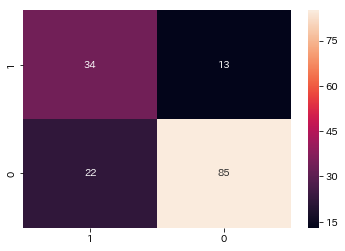

In [32]:
# Output of evaluation index

# Output of classification_report
# As a result, the standard parameters and accuracy are almost unchanged

print(classification_report(y_test, y_pred, labels=labels))

# Visualization of confusion matrix

conf_mtx = confusion_matrix(y_test, y_pred, labels=labels)
sns.heatmap(conf_mtx, annot=True, xticklabels=labels, yticklabels=labels)

### Application of other models (linear support vector machine identifier)

In [33]:
# Selection of prediction model

from sklearn.svm import LinearSVC
lsvc_gs = LinearSVC(class_weight='balanced', tol=1e-3,
                    max_iter=1e4, random_state=0)

# Adjustment range of hyper parameter
# Regularization index 'penalty': 'L1 norm' or 'L2 norm'
# Intensity of regularization 'C': From the fifth power to the fifth power of 10, 0.5 intervals
# Loss function 'loss': 'hinge loss' or 'squared hinge loss'

tuning_params = [
    {
        'penalty': ['l2'],
        'loss': ['hinge'],
        'dual': [True],
        'C': 10.**np.arange(-5, 5.5, 0.5)
    },
    {
        'penalty': ['l1'],
        'loss': ['squared_hinge'],
        'dual': [False],
        'C': 10.**np.arange(-5, 5.5, 0.5)
    },
    {
        'penalty': ['l2'],
        'loss': ['squared_hinge'],
        'dual': [True],
        'C': 10.**np.arange(-5, 5.5, 0.5)
    }
]

# Gspms instantiation of grid search
# Prediction model: lsvc_gs (linear support vector machine identification machine)
# Parameters to adjust: tuning_params
# Number of divided blocks in cross validation method: cv
# Scoring method: f1 value, micro average
# Parallel processing number: n_jobs (1 for no parallel processing, -1 for all processors)
# Weighting the score based on the number of samples of the test data: iid (this option will be deleted in the future)
# Score output of learning data: return_train_score (current default is 'warm' but in the future this option will be False)

gs_lsvc = GridSearchCV(
    lsvc_gs, tuning_params,
    cv=10, scoring='f1_micro', n_jobs=-1, 
    iid=False, return_train_score=False
)

In [34]:
# Performing a grid search

gs_lsvc.fit(st_X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=10000.0,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.001, verbose=0),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid=[{'penalty': ['l2'], 'loss': ['hinge'], 'dual': [True], 'C': array([1.00000e-05, 3.16228e-05, 1.00000e-04, 3.16228e-04, 1.00000e-03,
       3.16228e-03, 1.00000e-02, 3.16228e-02, 1.00000e-01, 3.16228e-01,
       1.00000e+00, 3.16228e+00, 1.00000e+01, 3.16228e+01, 1.00000e+02,
       3.162...e+02,
       3.16228e+02, 1.00000e+03, 3.16228e+03, 1.00000e+04, 3.16228e+04,
       1.00000e+05])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='f1_micro', verbose=0)

In [35]:
# Display the result of intersection verification (cv_results_attribute) as DataFrame
# Sort average accuracy in descending order

lsvc_gs_results = pd.DataFrame(gs_lsvc.cv_results_)
lsvc_gs_results.sort_values('mean_test_score', ascending=False)

,mean_fit_time,mean_score_time,mean_test_score,param_C,param_dual,param_loss,param_penalty,params,rank_test_score,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,std_fit_time,std_score_time,std_test_score
12,0.017020,0.000975,0.755802,10,True,hinge,l2,"{'C': 10.0, 'dual': True, 'loss': 'hinge', 'pe...",1,0.714286,...,0.754098,0.721311,0.803279,0.770492,0.688525,0.803279,0.770492,0.005386,0.000627,0.037102
8,0.001299,0.000681,0.754110,0.1,True,hinge,l2,"{'C': 0.1, 'dual': True, 'loss': 'hinge', 'pen...",2,0.714286,...,0.754098,0.721311,0.803279,0.737705,0.704918,0.786885,0.754098,0.000261,0.000084,0.034055
48,0.002065,0.000992,0.754084,0.01,True,squared_hinge,l2,"{'C': 0.01, 'dual': True, 'loss': 'squared_hin...",3,0.730159,...,0.754098,0.704918,0.819672,0.770492,0.688525,0.786885,0.737705,0.000879,0.000309,0.040116
29,0.001260,0.000960,0.754032,0.1,False,squared_hinge,l1,"{'C': 0.1, 'dual': False, 'loss': 'squared_hin...",4,0.746032,...,0.754098,0.688525,0.786885,0.786885,0.688525,0.786885,0.754098,0.000314,0.000923,0.038443
47,0.001685,0.000957,0.754031,0.00316228,True,squared_hinge,l2,"{'C': 0.0031622776601683794, 'dual': True, 'lo...",5,0.730159,...,0.786885,0.688525,0.786885,0.770492,0.688525,0.770492,0.737705,0.000821,0.000251,0.039082
14,0.069833,0.000896,0.752575,100,True,hinge,l2,"{'C': 100.0, 'dual': True, 'loss': 'hinge', 'p...",6,0.698413,...,0.786885,0.704918,0.786885,0.770492,0.688525,0.786885,0.770492,0.005533,0.000187,0.038754
13,0.030237,0.001172,0.752523,31.6228,True,hinge,l2,"{'C': 31.622776601683793, 'dual': True, 'loss'...",7,0.714286,...,0.770492,0.704918,0.803279,0.737705,0.688525,0.803279,0.770492,0.006713,0.000954,0.039221
56,0.204426,0.000836,0.752419,100,True,squared_hinge,l2,"{'C': 100.0, 'dual': True, 'loss': 'squared_hi...",8,0.746032,...,0.737705,0.704918,0.803279,0.770492,0.688525,0.786885,0.754098,0.023111,0.000198,0.034995
33,0.001302,0.000925,0.752393,10,False,squared_hinge,l1,"{'C': 10.0, 'dual': False, 'loss': 'squared_hi...",9,0.746032,...,0.737705,0.704918,0.803279,0.754098,0.688525,0.786885,0.754098,0.000375,0.000545,0.034417
30,0.001536,0.000659,0.752393,0.316228,False,squared_hinge,l1,"{'C': 0.31622776601683794, 'dual': False, 'los...",9,0.746032,...,0.721311,0.704918,0.803279,0.770492,0.688525,0.786885,0.754098,0.001191,0.000033,0.035944


In [36]:
print('Size of gs_results: ' + str(lsvc_gs_results.shape) )
print('Best Average Accuracy: ' + str(lsvc_gs_results.loc[lsvc_gs_results.index[0], 'mean_test_score']))

Size of gs_results: (63, 22)
Best Average Accuracy: 0.7134408602150538


In [37]:
# Confirmation of optimal parameters (best_estimator_attribute)

# As a result of cross validation, regularization index 'penalty' is L2 norm '
# Obtain the result that the strength 'C' of regularization is optimum to the power of 10, 
# the loss function 'loss' is 'optimal hinge loss'

gs_lsvc.best_estimator_

LinearSVC(C=10.0, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=10000.0,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.001, verbose=0)

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


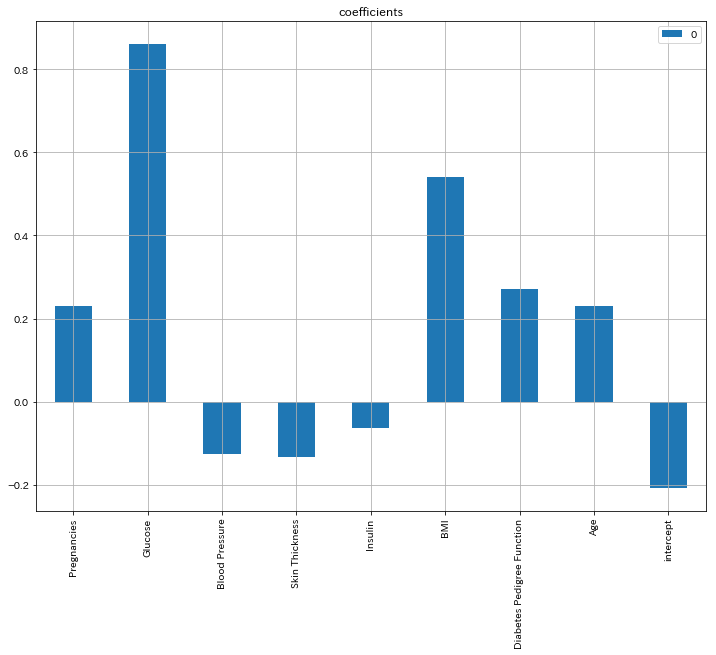

In [38]:
# Visualization of discriminant hyperplane coefficients

# Store in DataFrame

coefs = pd.DataFrame(
    gs_lsvc.best_estimator_.coef_,
    columns=df.columns[:-1]
)
coefs['intercept'] = gs_lsvc.best_estimator_.intercept_

# Visualization of DataFrame

coefs.T.plot(y=coefs.index, kind='bar', title='coefficients', grid=True, figsize=(12,9))

In [39]:
# Acquisition of forecast value

y_pred = gs_lsvc.predict(st_X_test)

              precision    recall  f1-score   support

           1       0.62      0.70      0.66        47
           0       0.86      0.81      0.84       107

   micro avg       0.78      0.78      0.78       154
   macro avg       0.74      0.76      0.75       154
weighted avg       0.79      0.78      0.78       154



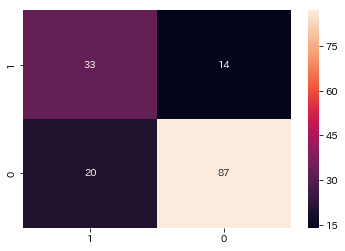

In [40]:
# Output of evaluation index

# Output of classification_report
# As a result, the best average precision of the grid search is higher than that of the logistic regression model,
# but the prediction accuracy was somewhat higher

print(classification_report(y_test, y_pred, labels=labels))

# Visualization of confusion matrix

conf_mtx = confusion_matrix(y_test, y_pred, labels=labels)
sns.heatmap(conf_mtx, annot=True, xticklabels=labels, yticklabels=labels)

## Supplement

The explanation of the main library used this time is as follows 
http://www.numpy.org/  
https://pandas.pydata.org/  
https://matplotlib.org/  
https://seaborn.pydata.org/  
http://scikit-learn.org/stable/  

The data used this time can be downloaded from the following  
https://github.com/niharikagulati/diabetesprediction/blob/master/diabetes.csv

Exclusion of abnormal values and application of nonlinear prediction model are not applied to the above analysis.
Please check whether these measures improve accuracy.